# Funções de plot

A princípio, não quero colocar os slides aqui. Quero deixar isso daqui só como uma referência mais rápida. Entretanto, talvez eu mude de opinião.

In [ ]:
#@title Importando as bibliotecas necessárias
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import numpy as np
from math import pi,cos,sin

In [ ]:
#@title Definindo como o numpy vai mostrar os números
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
np.set_printoptions(precision=3,suppress=True)

In [ ]:
#@title Função para definir as referências do 'plot'
def set_plot(ax=None,figure = None,lim=[-2,2]):
    """
        ax: Eixo que você quer usar
        figure: Figura que você quer usar
        lim: Limites que você quer usar.
    """

    # Criando as figuras e eixos, caso eles não foram passados.
    if figure is None:
        figure = plt.figure(figsize=(8,8))
    if ax is None:
        ax = plt.axes(projection='3d')

    ax.set_title("camera referecnce")
    ax.set_xlim(lim)
    ax.set_xlabel("x axis")
    ax.set_ylim(lim)
    ax.set_ylabel("y axis")
    ax.set_zlim(lim)
    ax.set_zlabel("z axis")
    return ax


In [ ]:
#@title Adicionado os vetores ao 'plot'
def draw_arrows(point,base,axis,length=1.5) -> plt.axis:
    """
        point:
        base:
        axis:
        length:

        The object base is a matrix, where each column represents the vector
        of one of the axis, written in homogeneous coordinates (ax,ay,az,0)
    """

    # Plot vector of x-axis
    axis.quiver(point[0],point[1],point[2],base[0,0],base[1,0],base[2,0],color='red',pivot='tail',  length=length)
    # Plot vector of y-axis
    axis.quiver(point[0],point[1],point[2],base[0,1],base[1,1],base[2,1],color='green',pivot='tail',  length=length)
    # Plot vector of z-axis
    axis.quiver(point[0],point[1],point[2],base[0,2],base[1,2],base[2,2],color='blue',pivot='tail',  length=length)

    return axis

In [ ]:
#@title Criando os vetores de base e a base em coordenadas homogêneas
def initial_setup():
    # base vector values
    e1 = np.array([[1],[0],[0],[0]]) # X
    e2 = np.array([[0],[1],[0],[0]]) # Y
    e3 = np.array([[0],[0],[1],[0]]) # Z
    base = np.hstack((e1,e2,e3)) # criando a base

    # Ponto de Origem
    origin_point = np.array([[0],[0],[0],[1]])

    # Camera frame
    # You can also consider the camera as an object composed by its base and origin
    # Then you can transform such object whenever you want to rotate or translate the camera
    cam = np.hstack([base,origin_point])

    return e1,e2,e3,base,origin_point,cam

In [ ]:
#@title Rotacionando nos eixos
from math import pi,cos,sin

def z_rotation(angle) -> np.ndarray:
    """ Rotação no eixo z em tantos 'angle' """
    rotation_matrix=np.array([[cos(angle),-sin(angle),0,0],
                              [sin(angle),cos(angle),0,0],
                              [0,0,1,0],
                              [0,0,0,1]])
    return rotation_matrix

def x_rotation(angle) -> np.ndarray:
    """ Rotação no eixo x em tantos 'angle' """
    rotation_matrix=np.array([[1,0,0,0],
                              [0, cos(angle),-sin(angle),0],
                              [0, sin(angle), cos(angle),0],
                              [0,0,0,1]])
    return rotation_matrix

def y_rotation(angle) -> np.ndarray:
    """ Rotação no eixo y em tantos 'angle' """
    rotation_matrix=np.array([[cos(angle),0, sin(angle),0],
                              [0,1,0,0],
                              [-sin(angle), 0, cos(angle),0],
                              [0,0,0,1]])
    return rotation_matrix

In [ ]:
#@title Criando a Matriz de Translação

# Também é conhecida como 'move(dx,dy,dz)'
def translation(dx,dy,dz) -> np.ndarray:
    """
        Movendo o vetor em dx,dy,dz em coordenadas
        homogêneas.
    """
    t = np.array([dx,dy,dz,1])
    T = np.eye(4)
    T[:,-1]=t.T
    return T


# Trechos De Códigos

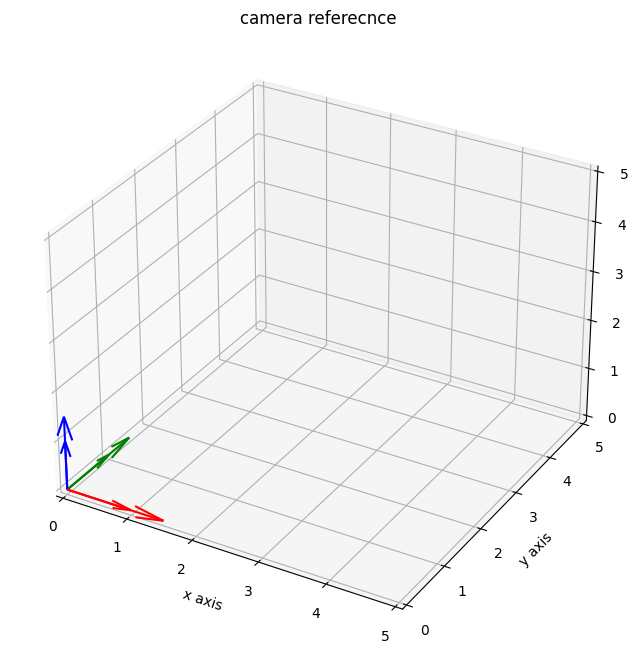

In [ ]:
######################
# World reference frame plotted at the origin
e1,e2,e3,base,origin_point,cam = initial_setup()
axis = set_plot(lim=[0,5])
axis = draw_arrows(origin_point,base,axis)

######################
# Camera reference frame plotted at the origin
axis = draw_arrows(cam[:,3],cam[:,0:3],axis,length=1.0)
